In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
from collections import Counter
df = pd.read_csv(r"C:\Users\ASUS\PycharmProjects\DataScience\archive (1).zip")

df.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


# Data Preprocessing

In [2]:
df.reset_index(drop=True, inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)
df['player_agent'] = df['player_agent'].str.rstrip(' ...')
df['club'] = df['club'].str.lstrip('1.')
df

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.00,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.00,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.90,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.30,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.00,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Takuma Asano,浅野 拓磨,28,1.73,Japan,"Komono, Mie",4.00,4.0,Attack - Right Winger,11,right,VfL Bochum,2024-06-30,2021-07-01,JEB ENTERTAINMENT,adidas
511,Philipp Hofmann,NaN,30,1.95,Germany,Arnsberg,2.50,2.5,Attack - Centre-Forward,33,left,VfL Bochum,2024-06-30,2022-07-01,ROOF,NaN
512,Simon Zoller,Simon Martin Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,Attack - Centre-Forward,9,right,VfL Bochum,2024-06-30,2019-01-01,GoalSky,Puma
513,Silvère Ganvoula,Silvère Ganvoula M'boussy,26,1.91,Congo,Brazzaville,0.75,2.5,Attack - Centre-Forward,35,right,VfL Bochum,2023-06-30,2019-07-05,BY Sport Consulting,Puma


# Top 10 players with the highest market value

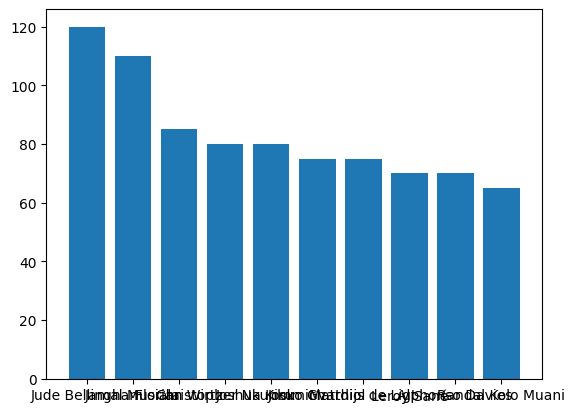

In [3]:
df = df.sort_values(by="price", ascending=False)

plt.bar(df['name'].head(10), df['price'].head(10))
plt.show()

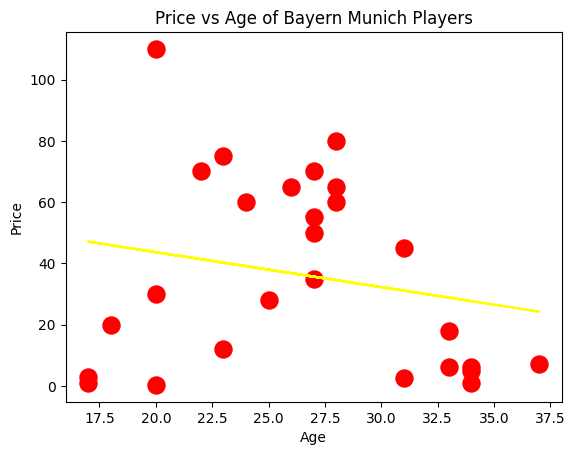

In [4]:
bayern = df[df['club'] == 'Bayern Munich']
bayern = bayern.sort_values(by="price", ascending=False)

slope, intercept, r, p, std_err = stats.linregress(bayern['age'], bayern['price'])
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, bayern['age']))
plt.scatter(bayern['age'], bayern['price'], s = 150, c = 'red')
plt.plot(bayern['age'], mymodel, c = 'yellow')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price vs Age of Bayern Munich Players')
plt.show()

Here I use the linear regressio model to predict the price of the players in Bayern Munich based on their age.
The model shows that the price of the players in Bayern Munich decreases as their age increases.

In [5]:
nations = Counter(df['nationality'])
nations

Counter({'Germany': 178,
         'Austria': 21,
         'Denmark': 12,
         'Croatia': 11,
         'Japan': 10,
         'Netherlands': 9,
         'Portugal': 7,
         'Germany\xa0\xa0Nigeria': 7,
         'Switzerland': 7,
         'Germany\xa0\xa0Turkey': 7,
         'Belgium': 6,
         'France\xa0\xa0DR Congo': 5,
         'France\xa0\xa0Guadeloupe': 5,
         'Spain': 5,
         'France': 5,
         'Czech Republic': 5,
         'Netherlands\xa0\xa0Suriname': 5,
         'Turkey\xa0\xa0Germany': 5,
         'Poland': 5,
         'Norway': 5,
         'Germany\xa0\xa0Kosovo': 5,
         'Germany\xa0\xa0England': 4,
         'Hungary': 4,
         'Brazil': 4,
         'Ghana\xa0\xa0Germany': 4,
         'Germany\xa0\xa0Greece': 4,
         'England': 3,
         'France\xa0\xa0Mali': 3,
         'France\xa0\xa0Cameroon': 3,
         "France\xa0\xa0Cote d'Ivoire": 3,
         'Germany\xa0\xa0Cameroon': 3,
         'France\xa0\xa0Guinea': 3,
         'Greece': 3,
  

In [6]:
nations1 = ['Germany', 'Austria', 'Denmark']
nations2 = {key: nations[key] for key in nations1}

total = len(df['nationality'])
percentage = {key: nations2[key] / total * 100 for key in nations2}
sums = sum(percentage.values())
others = 100 - sums
result = {key: percentage[key] for key in percentage}
result['Others'] = others
result

{'Germany': 34.56310679611651,
 'Austria': 4.077669902912621,
 'Denmark': 2.3300970873786406,
 'Others': 59.02912621359223}

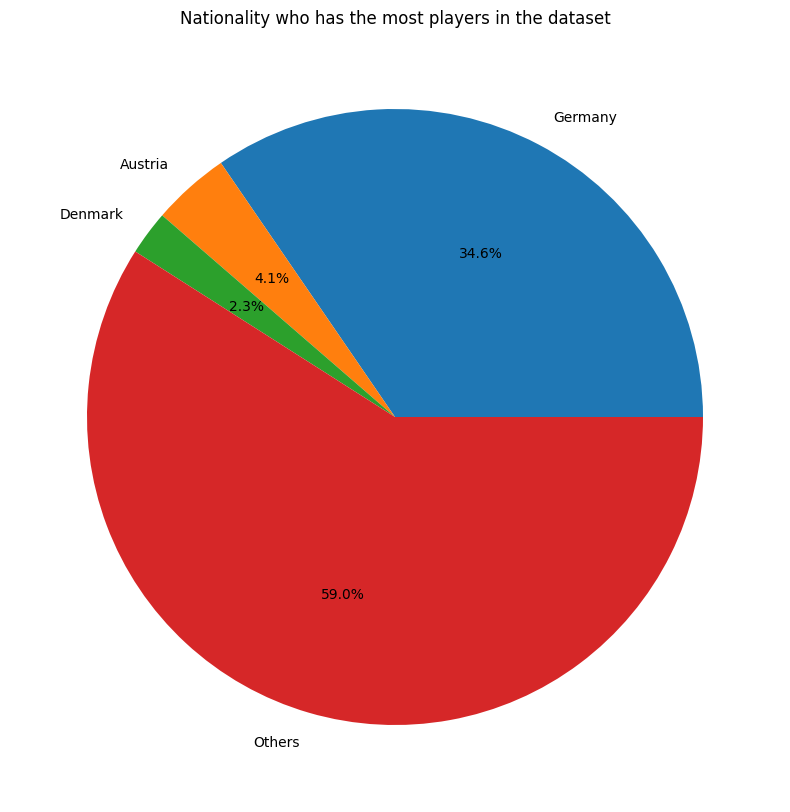

In [7]:
plt.figure(figsize=(10, 10))
plt.pie(result.values(), labels=result.keys(), autopct='%1.1f%%')
plt.title('Nationality who has the most players in the dataset')
plt.show()

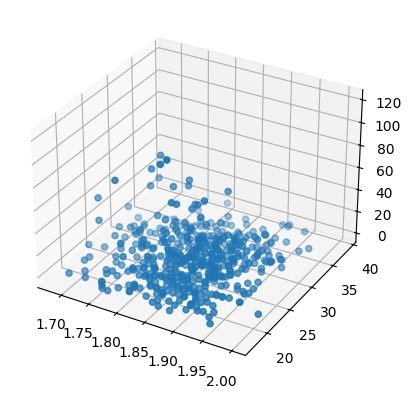

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['height'], df['age'], df['price'])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tile'

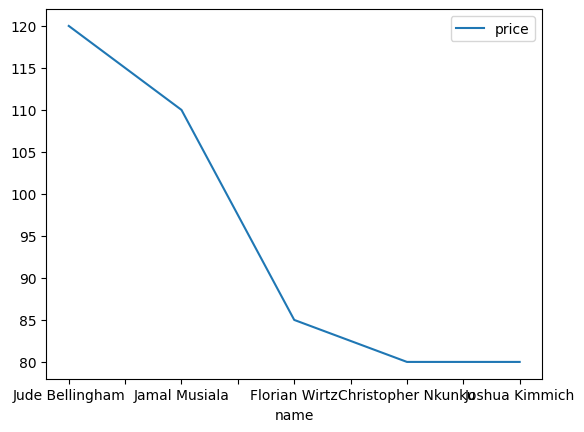

In [9]:
top5 = df.head(5)
top5.plot(x='name', y='price', kind='line')
plt.tile('Top 5 players with the highest market value')
plt.show()